In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
  

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [5]:
class_names = training_ds.class_names

In [6]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/pc/Desktop/New Plant Diseases Dataset 2 classes/New Plant Diseases Dataset/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 53910 files belonging to 2 classes.


In [7]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/pc/Desktop/New Plant Diseases Dataset 2 classes/New Plant Diseases Dataset/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 53910 files belonging to 2 classes.


In [8]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [9]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
## lets train our CNN
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 2)

Epoch 1/2
540/540 [==============================] - 4779s 9s/step - loss: 0.2341 - accuracy: 0.9217 - val_loss: 0.0580 - val_accuracy: 0.9803
Epoch 2/2
540/540 [==============================] - 4666s 9s/step - loss: 0.0598 - accuracy: 0.9794 - val_loss: 0.0307 - val_accuracy: 0.9895


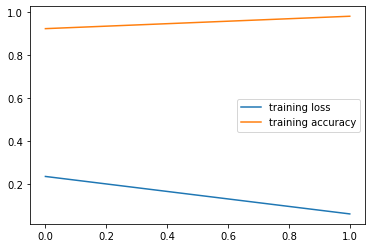

In [11]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

4/4 [==============================] - 1s 211ms/step


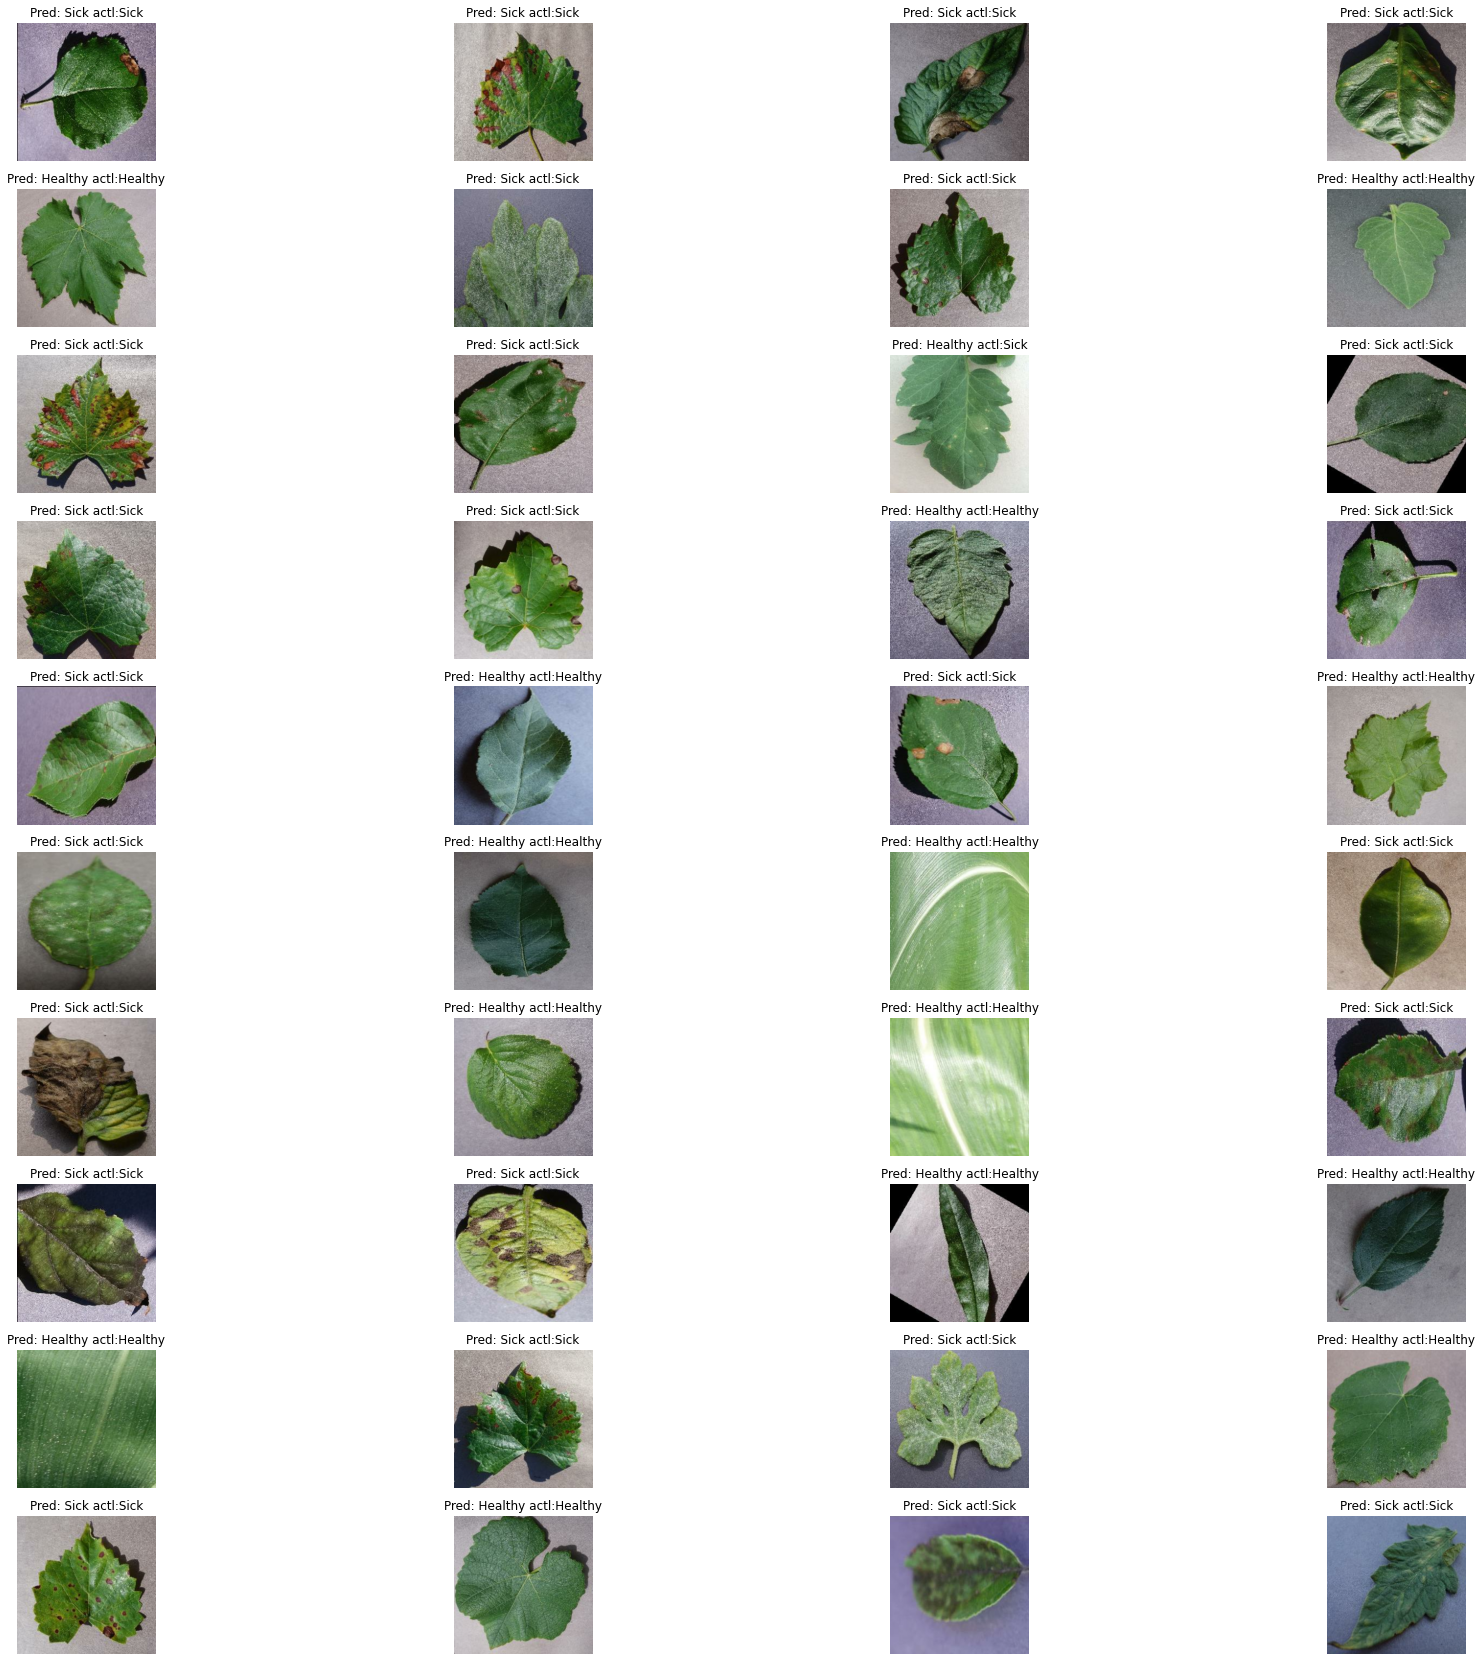

In [12]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
        plt.grid(True)
        f = open('resultat.txt' , 'w')
        f.write(predlabel[i])
        f.close

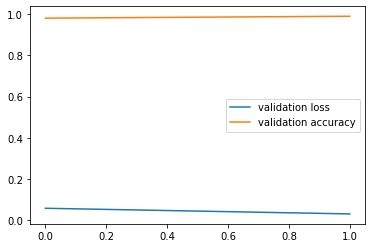

In [13]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [17]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
MyCnn.save('model.h5')

In [19]:
#####################################################################
# lets now see time taken and validation accuracy and model size    #
#####################################################################
start = perf_counter() 
_, unPrunnedAccuracy = MyCnn.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizeUnprunned = os.path.getsize('model.h5')
# let convert to MB
sizeUnprunned = sizeUnprunned / (1024 * 1024)

print ('unPrunned model Summary:')
print('Model size(MB) : {}'.format(sizeUnprunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(unPrunnedAccuracy))


unPrunned model Summary:
Model size(MB) : 316.51148223876953
Time on Validation data (sec) : 881.3194170000006
Accuracy on validation data: 0.9894824624061584
